## 1 - Importing Libraries

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np
%matplotlib inline

## 2 - Loading Data

In [3]:
df = pd.read_csv("Data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3 - EDA : Exploratory Data Analysis

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0, 0.5, 'Proportion of observations')

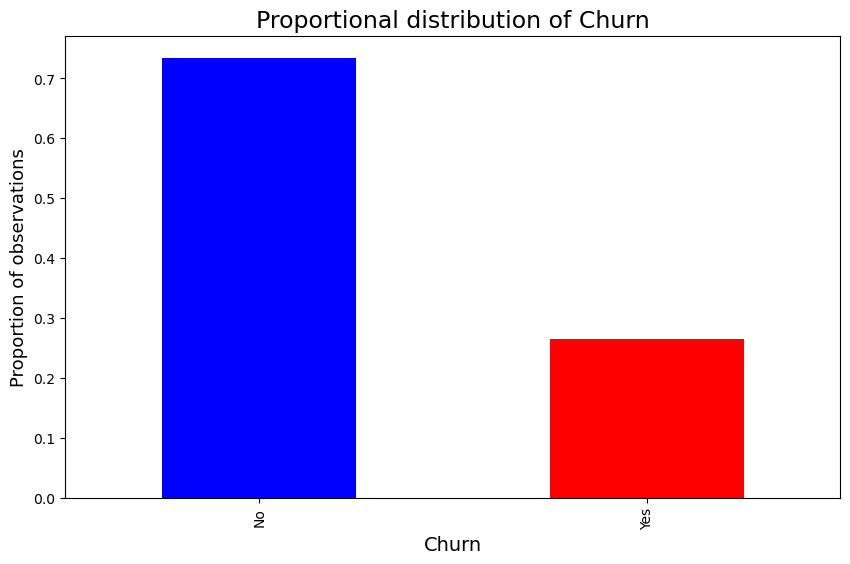

In [8]:
churn = df["Churn"].value_counts(normalize=True)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
churn.plot(ax=ax ,kind="bar", color=["blue","red"])
ax.set_title('Proportional distribution of Churn', fontsize=17)
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Proportion of observations', fontsize=13)

<Axes: xlabel='Partner'>

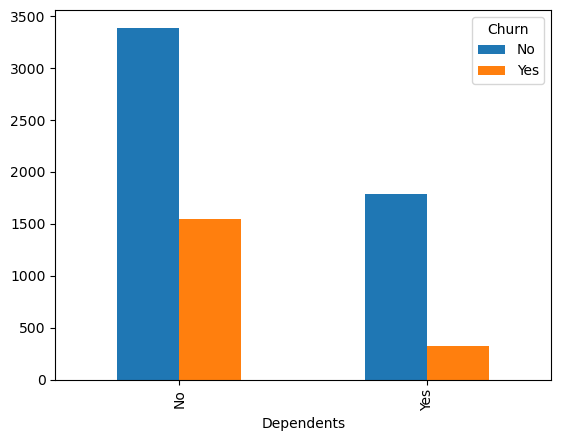

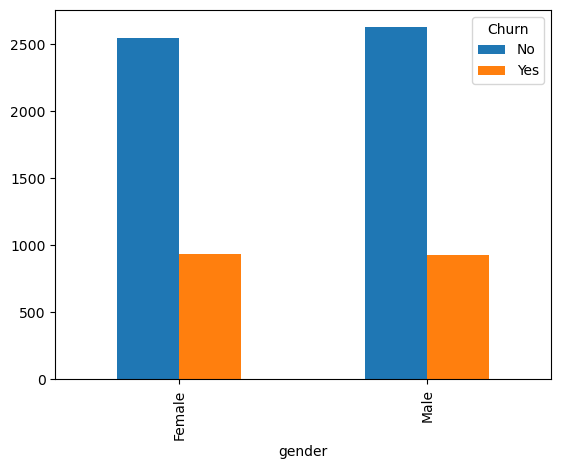

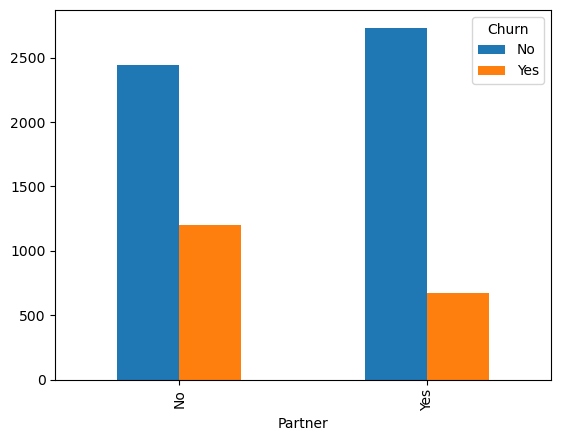

In [9]:
pd.crosstab(df.Dependents, df.Churn).plot(kind='bar')
pd.crosstab(df.gender, df.Churn).plot(kind='bar')
pd.crosstab(df.Partner, df.Churn).plot(kind='bar')

#### We notice that gender and partner do not impact much the results

## 4 - Data Preprocessing

In [10]:
df.drop(["customerID",'gender',"Partner"], axis="columns", inplace=True)

In [11]:
df.columns

Index(['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
min_threshold, max_threshold = df.tenure.quantile([0.05, 0.95])

In [13]:
df[(df.tenure < min_threshold) | (df.tenure > max_threshold)]

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,0,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,0,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,0,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,0,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,0,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,0,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,0,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,0,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,0,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df1 = df[~((df.tenure < min_threshold) | (df.tenure > max_threshold))]

In [15]:
df1.shape

(7032, 18)

In [16]:
type(df1.TotalCharges[0])

str

In [17]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
type(df1.TotalCharges[0])

C:\Users\s_bou\AppData\Local\Temp\ipykernel_39016\2881897765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')


numpy.float64

In [18]:
df1.corr()

C:\Users\s_bou\AppData\Local\Temp\ipykernel_39016\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [19]:
left = df1[df1.Churn == "No"]
left.shape

(5163, 18)

In [20]:
retined = df1[df1.Churn == "Yes"]
retined.shape

(1869, 18)

In [21]:
df1.groupby("Churn").mean()

C:\Users\s_bou\AppData\Local\Temp\ipykernel_39016\2516347524.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby("Churn").mean()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128995,37.650010,61.307408,2555.344141
Yes,0.254682,17.979133,74.441332,1531.796094


#### Those who have less MonthlyCharges tend to stay.
#### Those with longer tenure tend to stay.

In [22]:
df1.drop("TotalCharges", axis="columns", inplace=True)

C:\Users\s_bou\AppData\Local\Temp\ipykernel_39016\4098150254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("TotalCharges", axis="columns", inplace=True)


In [23]:
df1.dtypes

SeniorCitizen         int64
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [24]:
data = pd.get_dummies(df1, columns=["Dependents","PhoneService","MultipleLines","InternetService",
                                      "OnlineBackup","DeviceProtection","TechSupport","StreamingTV",
                                    "StreamingMovies","Contract","PaperlessBilling","Churn","PaymentMethod","OnlineSecurity"],drop_first=True)

In [25]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,0,1,29.85,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,34,56.95,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,0,2,53.85,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
3,0,45,42.30,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,2,70.70,0,1,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0


## 5 - Saving Cleaned Data

In [26]:
data.to_csv("Cleaned_Churn_Data.csv")

## 6 - Spearting Data

In [27]:
X = data.drop("Churn_Yes", axis="columns")
Y = data.Churn_Yes

## 7 - Building Model 

In [28]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=15)
res = cross_val_score(LogisticRegression(max_iter=1000), X,Y, cv=cv)
res1 = cross_val_score(KNeighborsClassifier(n_neighbors=10), X,Y, cv=cv)
res2 = cross_val_score(tree.DecisionTreeClassifier(), X,Y, cv=cv)
res3 = cross_val_score(RandomForestClassifier(), X,Y, cv=cv)

print("Logisitic Regression score : --> ", res.mean())
print("KNN Classifier score : --> ", res1.mean())
print("Decision Tree Classifier score : --> ", res2.mean())
print("Random Forest score : --> ", res3.mean())

Logisitic Regression score : -->  0.8014214641080313
KNN Classifier score : -->  0.7864960909737029
Decision Tree Classifier score : -->  0.7326226012793177
Random Forest score : -->  0.7863539445628998


## 8 - Hyperparameter Tuning

In [29]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'penalty': [None, 'l1','l2','elasticnet'],
                "C":[100,10,1,0.01],
                "solver":["liblinear","sag","saga"],
                "random_state":[10,100,1]
            }
        },
        'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [5,10,3],
                'weights': ['uniform', 'distance'],
                "algorithm":['ball_tree',"kd_tree","brute"]
            }
        },
        'decision_tree': {
            'model': tree.DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini','entropy',"log_loss"],
                'splitter': ['best','random']
            }
        },
        "random_forest":{
            
            'model': RandomForestClassifier(),
            'params':{
                    "n_estimators":[100,1000,10]
            }
            
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params": gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
Results = find_best_model_using_gridsearchcv(X,Y)

C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None w

C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reache

C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=No

C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=No

C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\s_bou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan 0.80113717 0.80042644        nan 0.80113717 0.80042644
        nan 0.80113717 0.80042644 0.8021322         nan 0.80042644
 0.8018479         nan 0.80042644 0.8021322         nan 0.80042644
 0.80142146 0.80113717 0.80042644 0.80142146 0.80113717 0.80042644
 0.80142146 0.80113717 0.80042644        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.80113717 0.80042644        nan 0.80113717 0.80042644
        nan 0.80113717 0.80042644 0.80199005        nan 0.80071073
 0.80170576        nan 0.80071073 0.80170576        nan 0.80071073
 0.80142146 0.80113717 0.80042644 0.80142146 0.80113717 0.80042644
 0.80142146 0.80113717 0.80042644        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.80113717 0.80042644        nan 0.801137

In [30]:
Results

,model,best_score,best_params
0,logistic_regression,0.803980,"{'C': 0.01, 'penalty': 'l2', 'random_state': 1..."
1,knn,0.790476,"{'algorithm': 'ball_tree', 'n_neighbors': 10, ..."
2,decision_tree,0.739446,"{'criterion': 'gini', 'splitter': 'best'}"
3,random_forest,0.790050,{'n_estimators': 1000}


In [31]:
Results.best_params[0]

{'C': 0.01, 'penalty': 'l2', 'random_state': 10, 'solver': 'liblinear'}

## 9 - Splitting Data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## 10 - Final Model

In [34]:
lo_reg = LogisticRegression(C=0.01, penalty = 'l2', random_state = 10, solver = "liblinear")
lo_reg.fit(X_train,y_train)

LogisticRegression(C=0.01, random_state=10, solver='liblinear')

In [35]:
lo_reg.score(X_test,y_test)

0.7996553209823352

In [36]:
y_train_pred = lo_reg.predict(X_train)
y_test_pred = lo_reg.predict(X_test)

## 11 - Saving Model

In [44]:
pickle.dump(lo_reg,open("log_reg.pkl","wb"))

## 11 - Model Performance

In [45]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

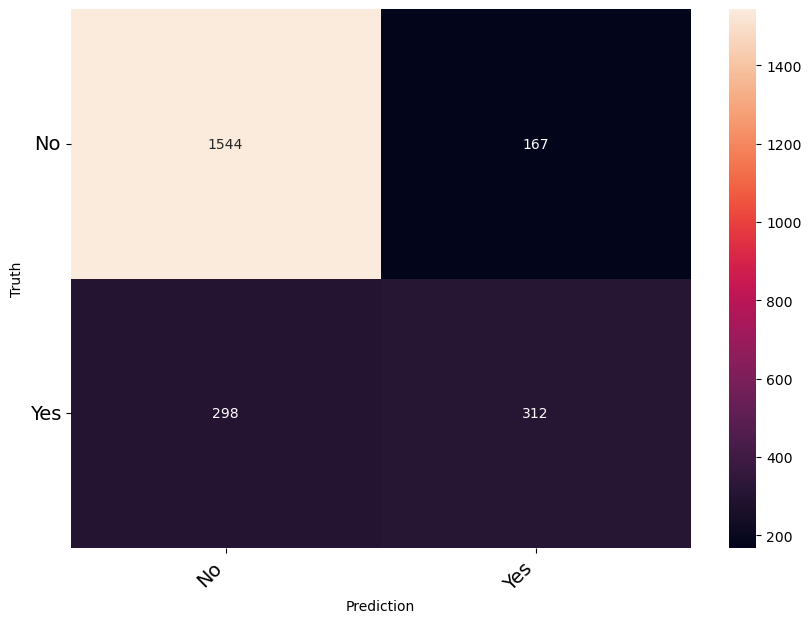

In [40]:
cm = confusion_matrix(y_test,y_test_pred)
# No means those staying at the firm, Yes means those leaving the firm
print_confusion_matrix(cm, ["No", "Yes"])

In [46]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.65      0.51      0.57       610

    accuracy                           0.80      2321
   macro avg       0.74      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



In [47]:
print("Recall score on the training set", recall_score(y_test, y_test_pred))

Recall score on the training set 0.5114754098360655


In [48]:
print("Precision score on the training set", precision_score(y_test, y_test_pred))

Precision score on the training set 0.651356993736952
